# Preliminary operations

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import dataframe (without outliers)
df = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data cleaned/df_prep.xlsx", index_col="Unnamed: 0").sort_values("emotion")

In [32]:
# import dataframe (without outliers)
df_opt = pd.read_excel("drive/MyDrive/Progetto Data Mining 1/Data Understanding & Preparation/Data prepared final/df_opt.xlsx", index_col="Unnamed: 0").sort_values("emotion")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 1972 to 948
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   int64  
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   frame_width          2452 non-null   int64  
 9   length_ms            2452 non-null   int64  
 10  frame_count          2452 non-null   int64  
 11  intensity            2452 non-null   float64
 12  zero_crossings_sum   2452 non-null   int64  
 13  mfcc_mean            2452 non-null   float64
 14  mfcc_std             2452 non-null   float64
 15  mfcc_min             2452 non-null  

In [36]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2452 entries, 1972 to 948
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vocal_channel        2452 non-null   object 
 1   emotion              2452 non-null   object 
 2   emotional_intensity  2452 non-null   object 
 3   statement            2452 non-null   object 
 4   repetition           2452 non-null   object 
 5   actor                2452 non-null   int64  
 6   sex                  2452 non-null   object 
 7   channels             2452 non-null   int64  
 8   length_ms            2452 non-null   float64
 9   intensity            2452 non-null   float64
 10  zero_crossings_sum   2452 non-null   float64
 11  mfcc_mean            2452 non-null   float64
 12  mfcc_max             2452 non-null   float64
 13  sc_mean              2452 non-null   float64
 14  sc_std               2452 non-null   float64
 15  sc_min               2452 non-null  

In [5]:
df_info = df.loc[:, "vocal_channel":"sex"]
df_data = df.loc[:, "length_ms":"skew"]

In [6]:
#cols_cat = ["vocal_channel", "emotional_intensity", "sex"] 
#cols_data = ["intensity", "zero_crossings_sum", "mean", "max", "min", "skew", "std", "kur"]
cols_data = df_data.columns

# Categorical analysis

In [ ]:
sns.set_theme()
for col_data in cols_data:
  print(col_data)
  #for col_cat in cols_cat:
  sns.catplot(
    data=df, x="emotion", y=col_data,
    kind="boxen", aspect=4
  )
  plt.show()

In [ ]:
sns.set_theme()
for col_data in cols_data:
  print(col_data)
  for col_cat in cols_cat:
    sns.catplot(
      data=df, x="emotion", y=col_data,
      kind="point", aspect=4
    )
    plt.show()

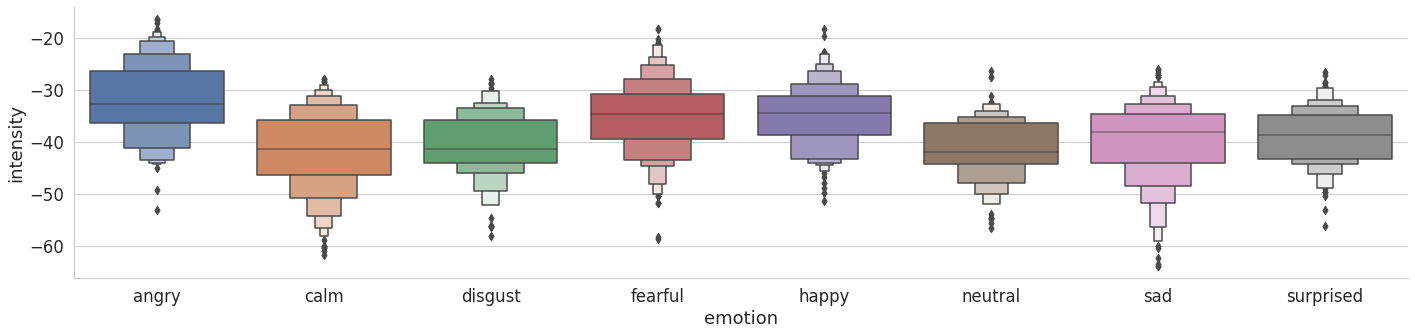

In [75]:
#sns.set_style("whitegrid")
sns.set(style="whitegrid", font_scale=1.5)
sns.catplot(
    data=df, x="emotion", y="intensity",
    kind="boxen", aspect=4
)
plt.savefig("intensity_emotions.svg", format="svg")
plt.show()

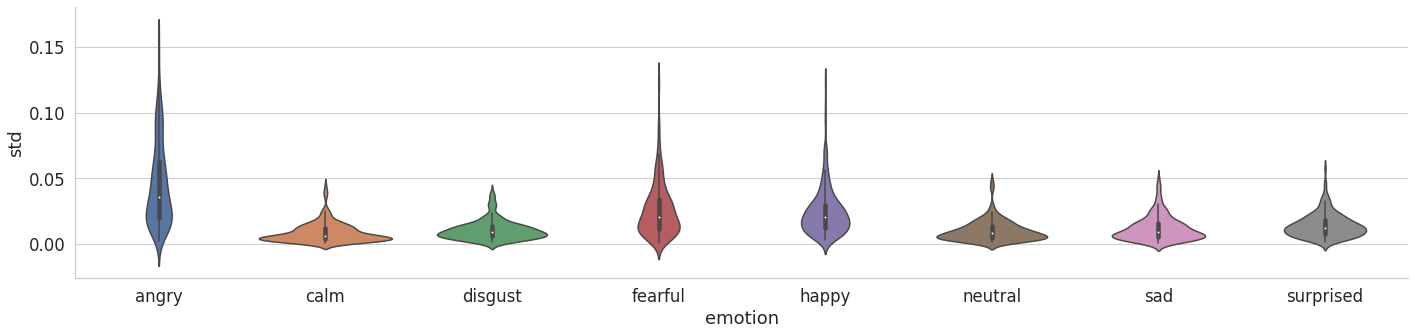

In [76]:
#sns.set_style("whitegrid")
sns.set(style="whitegrid", font_scale=1.5)
sns.catplot(
    data=df, x="emotion", y="std",
    kind="violin", aspect=4
)
plt.savefig("std_emotions.svg", format="svg")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

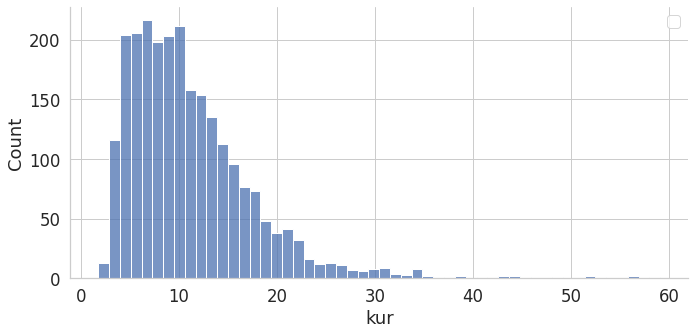

In [60]:
sns.set(style="whitegrid", font_scale=1.5)
sns.displot(df, x="kur", aspect=2)
plt.legend(loc='upper right')
plt.savefig("kur_with_outliers.svg", format="svg")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

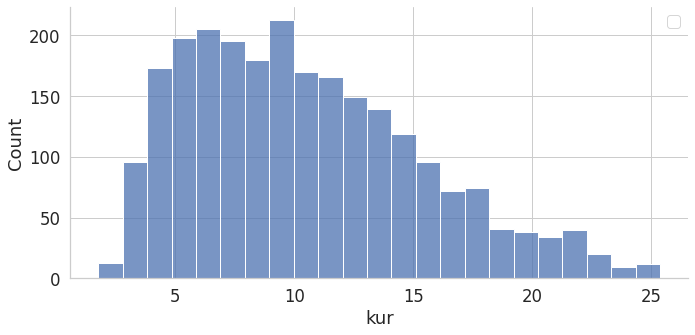

In [61]:
sns.set(style="whitegrid", font_scale=1.5)
sns.displot(df_opt, x="kur", aspect=2)
plt.savefig("kur_without_outliers.svg", format="svg")
plt.legend(loc='upper right')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

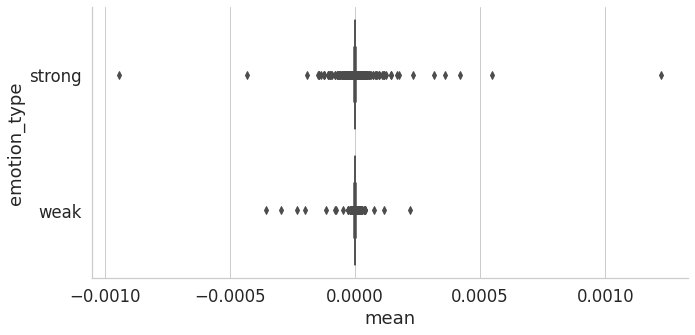

In [55]:
sns.set(style="whitegrid", font_scale=1.5)
sns.catplot(
    data=df, x="mean", y="emotion_type",
    kind="box", aspect=2
)
plt.savefig("mean_with_outliers.svg", format="svg")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

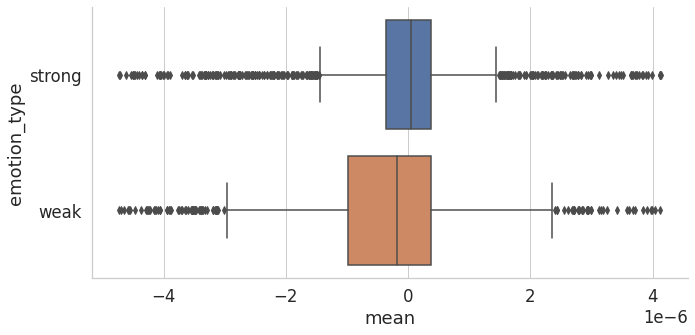

In [56]:
sns.set(style="whitegrid", font_scale=1.5)
sns.catplot(
    data=df_opt, x="mean", y="emotion_type",
    kind="box", aspect=2
)
plt.savefig("mean_without_outliers.svg", format="svg")
plt.show

# Correlation Analysis

In [ ]:
df_data.corr()[(df_data.corr() < 1.0) & ((df_data.corr() > 0.75) | (df_data.corr() < -0.75))]


,length_ms,intensity,zero_crossings_sum,mfcc_mean,mfcc_max,sc_mean,sc_std,sc_min,sc_max,sc_kur,stft_mean,stft_std,stft_min,stft_kur,mean,kur,skew
length_ms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
intensity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero_crossings_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mfcc_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mfcc_max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sc_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sc_std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sc_min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sc_max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sc_kur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


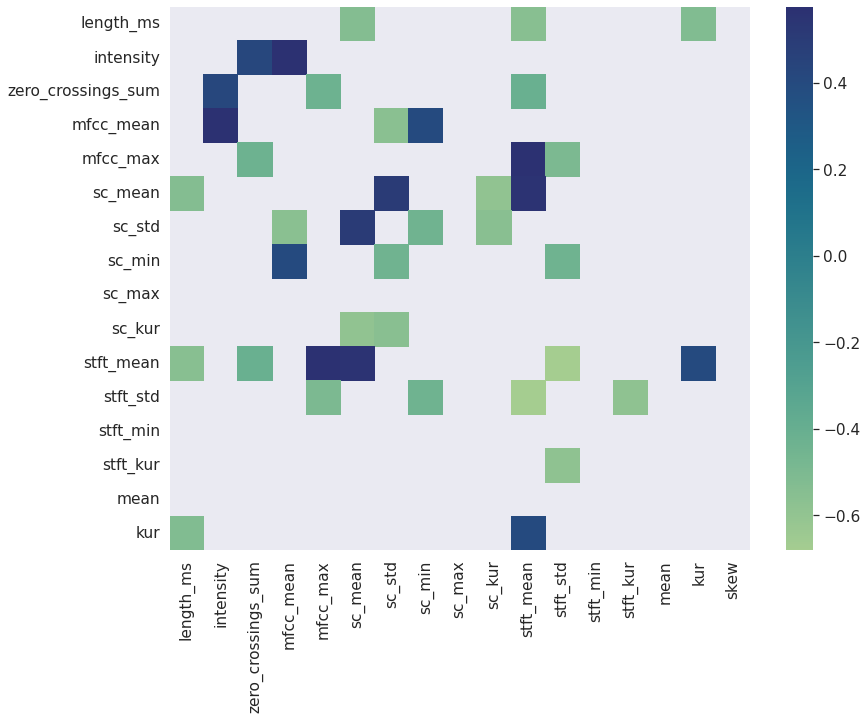

In [ ]:
df_datacorr = df_data.corr()[(df_data.corr() < 1.0) & ((df_data.corr() > 0.4) | (df_data.corr() < -0.4))]
sns.set(rc={'figure.figsize':(13, 10)})
sns.set(font_scale=1.4)
sns.heatmap(df_datacorr[:-1], cmap="crest") #Remove last element (not correlated)
plt.show()

In [ ]:
cols_general = ["intensity", "zero_crossings_sum", "mean", "max", "min", "skew", "std", "kur"]

cols_groups = [
    ["mfcc_mean", "mfcc_std", "mfcc_min", "mfcc_max"],
    ["sc_mean", "sc_std", "sc_min", "sc_max", "sc_kur", "sc_skew"],
    ["stft_mean", "stft_std", "stft_min", "stft_kur", "stft_skew"]
]

['mfcc_mean', 'mfcc_std', 'mfcc_min', 'mfcc_max']


KeyError: ignored

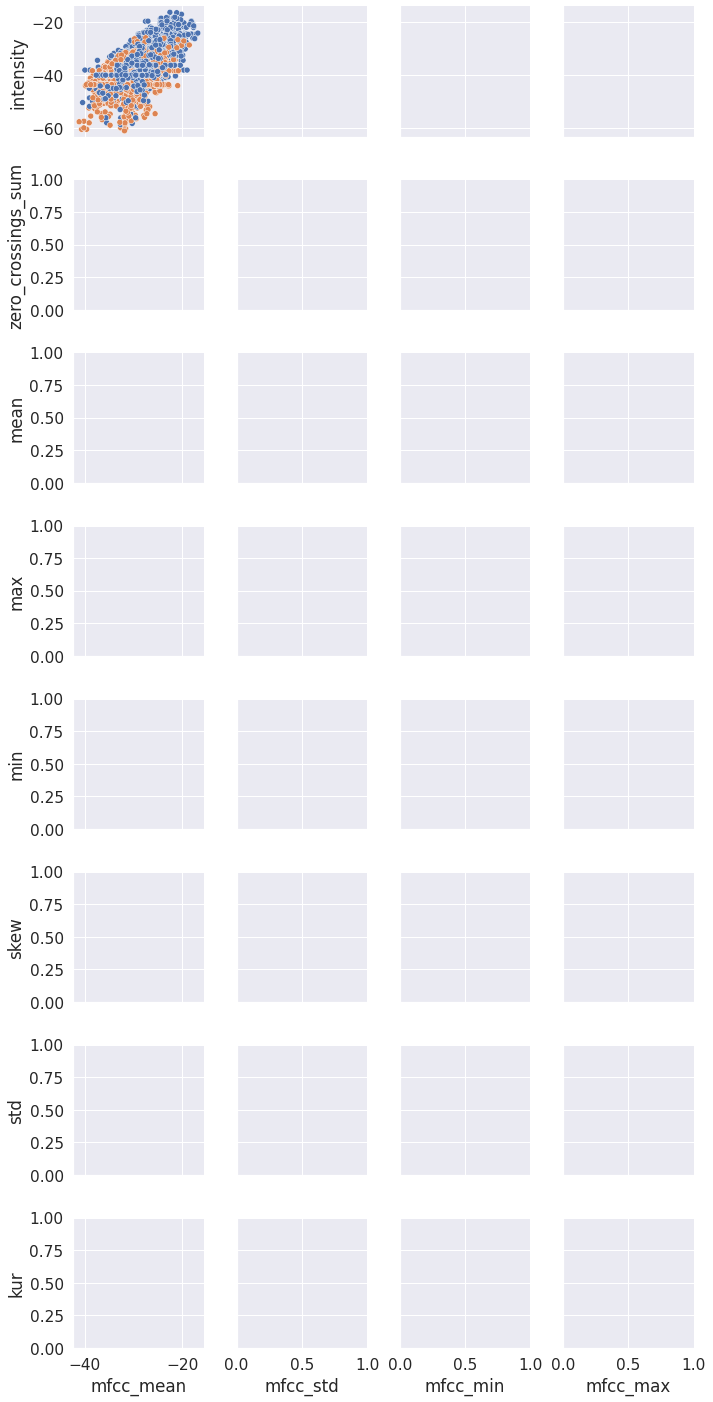

In [ ]:
for cols_group in cols_groups:
  print(cols_group)
  sns.pairplot(df, 
               height=2.5, 
               x_vars=cols_group, 
               y_vars=cols_general,
               hue="emotion_type"
  )
  plt.show()

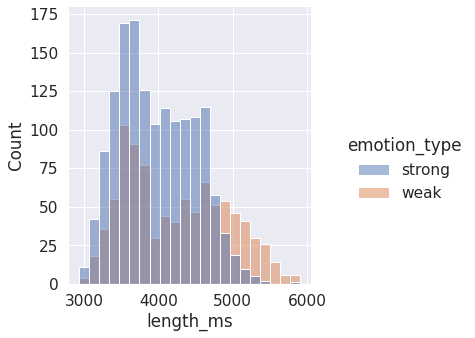

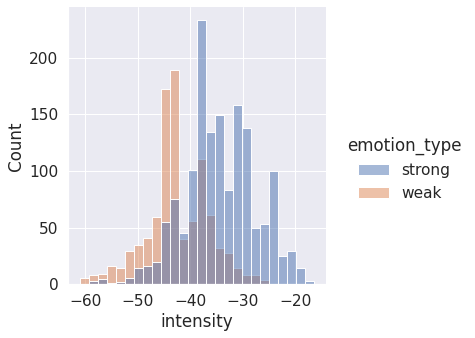

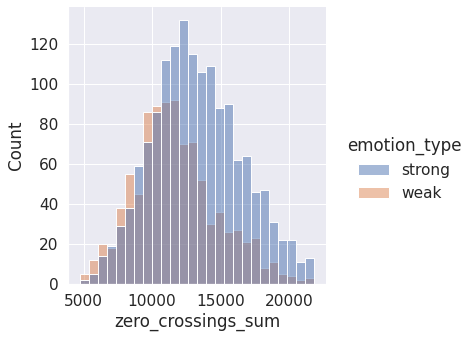

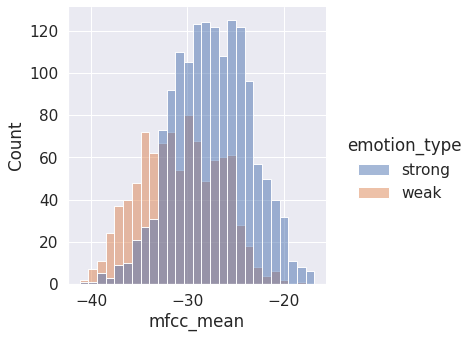

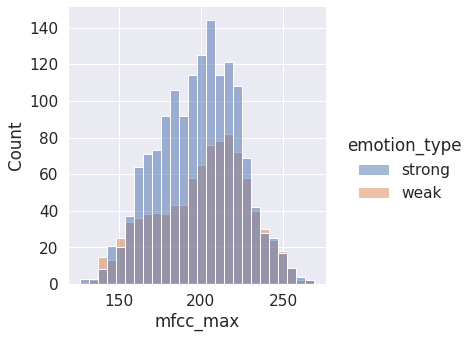

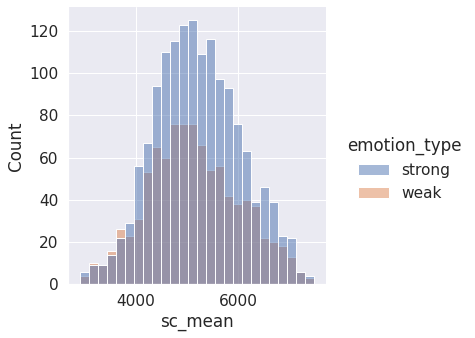

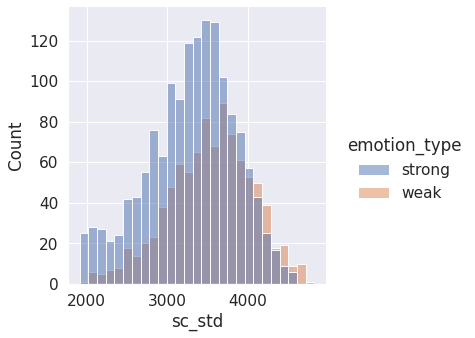

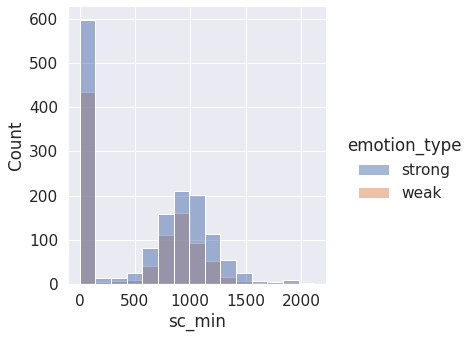

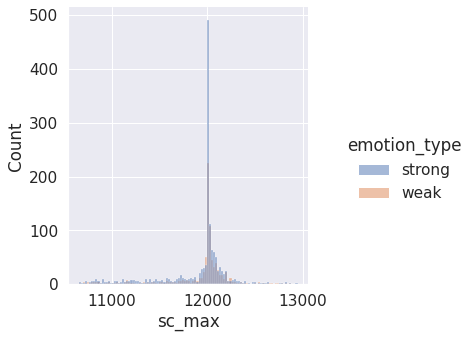

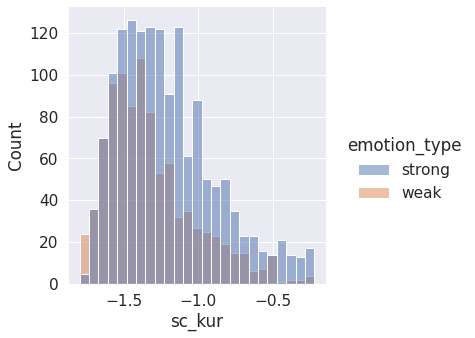

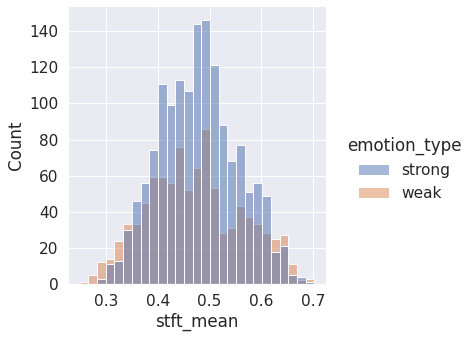

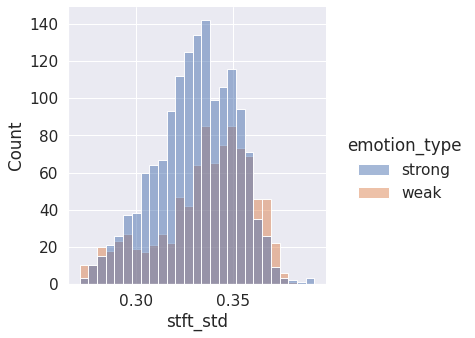

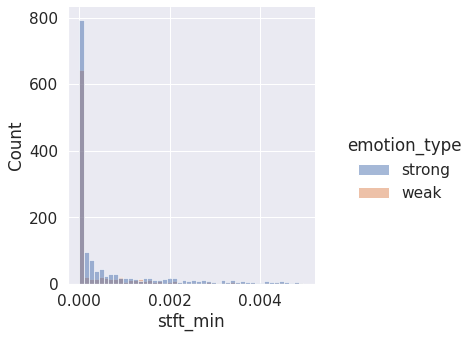

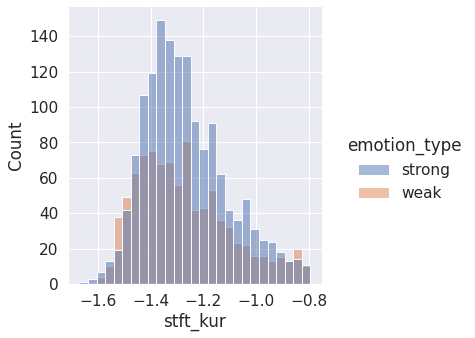

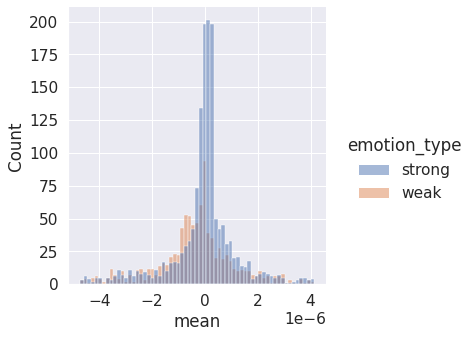

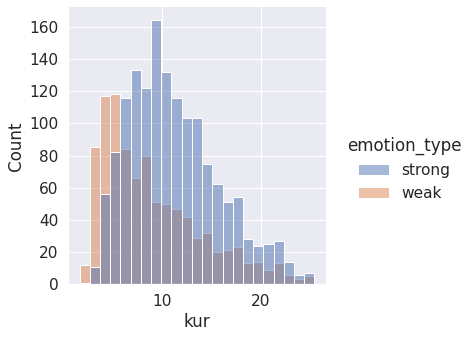

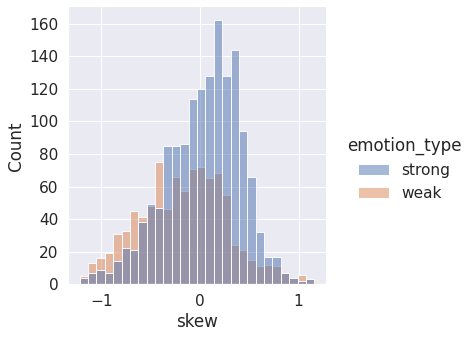

In [ ]:
for column in cols_data:
  sns.displot(df, x=column, hue="emotion_type")
  plt.show()